In [16]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex3.python.libs import *

In [18]:
mpl.rcParams['figure.dpi'] = 150

# 1. Multi-class Classification

In [19]:
input_layer_size = 400
num_labels = 10

## 1.1 Loading data

**ex3data1.mat** contains 2 variables
- matrix X, contains 5000 examples, each rows is a unrolled 20x20 grayscale image of the digit.
- vector y, contains 5000 labels, but since octave starts from index 1, to make things more compatible with octave, the '0' digit is labeled as 10, while the digits '1' to '9' are labeled as '1' to '9' in their natural order.

In [20]:
data = sio.loadmat('../../data/ex3data1.mat')
X = data['X']
y = data['y'].flatten() # because it's column vector
m = X.shape[0]

## 1.2 Visualizing data

In [21]:
rand_indices = np.random.choice(m, 100)
sel = X[rand_indices, :]

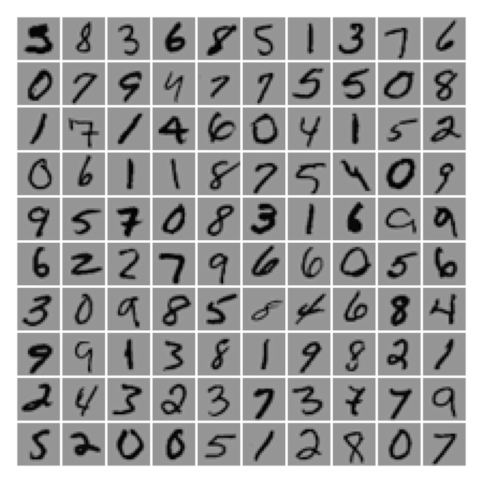

In [22]:
display_data(sel);

## 1.4 One-vs-all prediction

In [23]:
lb = 0.1
all_theta = one_vs_all(X, y, num_labels, lb)

         Current function value: 0.013690
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.056303
         Iterations: 50
         Function evaluations: 145
         Gradient evaluations: 145
         Current function value: 0.061948
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037401
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063750
         Iterations: 50
         Function evaluations: 131
         Gradient evaluations: 131
         Current function value: 0.020026
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033451
         Iterations: 50
         Function evaluations: 159
         Gradient evaluations: 159
         Current function value: 0.085504
      

In [24]:
pred = predict_one_vs_all(all_theta, X)
print(f'Training Set Accuracy: {(pred==y).mean() * 100}')

Training Set Accuracy: 95.1


Displaying Example Image
One-vs-All Prediction: [5]


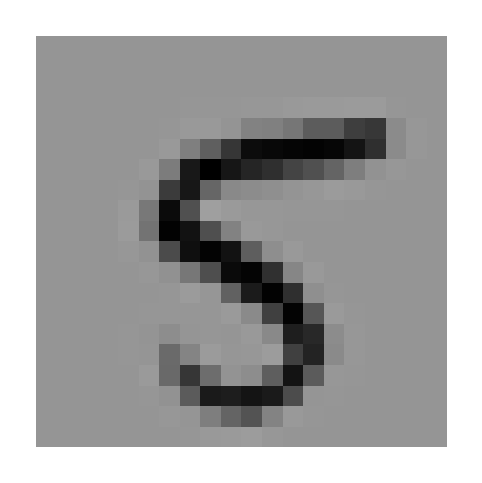

In [25]:
print('Displaying Example Image')
example = X[np.random.choice(m, 1), :]
display_data(example)
pred = (predict_one_vs_all(all_theta, example)) % num_labels
print(f'One-vs-All Prediction: {pred}')

# 2. Neural Networks
**ex3weights** contains trained parameters $\Theta_1, \Theta_2$

```octave
size(Theta1) == [25 401]
size(Theta2) == [10 26]
```

$L=2$

$s_0=400, s_1=25, s_2 = s_L=10$

we apply forward propagation algorithm with these 2 $\Theta_1, \Theta_2$ for prediction

In [26]:
input_layer_size = 400
hidder_layer_size = 25
num_labels = 10

In [27]:
data = sio.loadmat('../../data/ex3weights.mat')

In [28]:
Theta1 = data['Theta1']
Theta2 = data['Theta2']

In [29]:
pred = predict(Theta1, Theta2, X)
print(f'Training Set Accuracy: {(pred==y).mean() * 100}')

Training Set Accuracy: 97.52


Displaying Example Image
Neural Networks Prediction: [4]


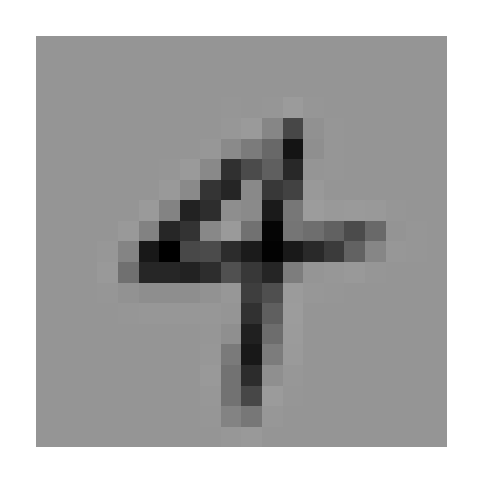

In [30]:
print('Displaying Example Image')
example = X[np.random.choice(m, 1), :]
display_data(example)
pred = (predict(Theta1, Theta2, example)) % num_labels
print(f'Neural Networks Prediction: {pred}')